In [31]:
import os
import time
import torch

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from sparsecoding.preprocess import patch_images, preprocess_images
from sparsecoding import inference

### Define constants and load data

In [34]:
img_dir = os.path.join(os.environ['DATA_PATH'], 'data/IMAGES.mat')
images = loadmat(img_dir)['IMAGES']
images = torch.tensor(images)
print(images.shape)

torch.Size([512, 512, 10])


In [35]:
n_images = images.shape[-1]
n_divisions = 16

image_data, n_images, n_divisions, patch_size_x, patch_size_y = patch_images(images, n_divisions=n_divisions)
data = preprocess_images(image_data, patch_size_x, patch_size_y)

n_samples, n_features = data.shape

### Visualize patches

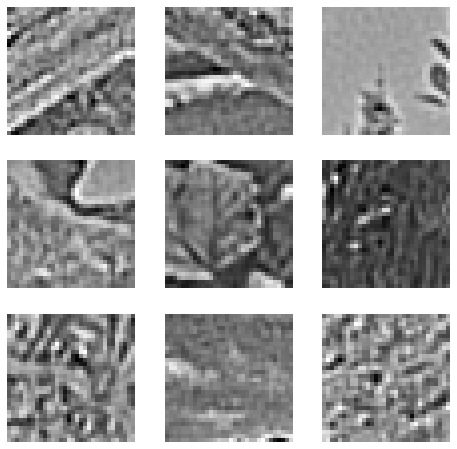

In [39]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img = (data[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().reshape([patch_size_x,patch_size_y]), cmap="gray")
plt.show()

### Sparse Coding

In [40]:
# define random dictionary
n_basis = 100
n_features = patch_size_x**2
dictionary = 2*torch.rand([n_features,n_basis]) - 1

# verify LCA method 
lca = inference.LCA(coeff_lr=1e-3,threshold=0.1)
A = lca.infer(data[:,:],dictionary)

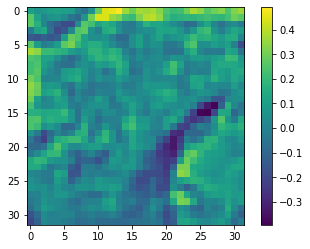

In [41]:
plt.imshow(data[0,:].detach().reshape(patch_size_x,patch_size_x))
plt.colorbar()
plt.show()

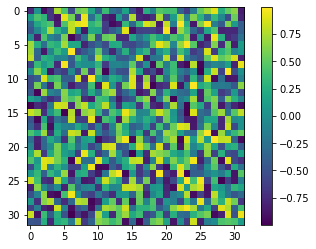

In [42]:
plt.imshow(dictionary[:,0].detach().reshape(patch_size_x,patch_size_x))
plt.colorbar()
plt.show()

In [45]:
print(A.shape)

torch.Size([2560, 100])


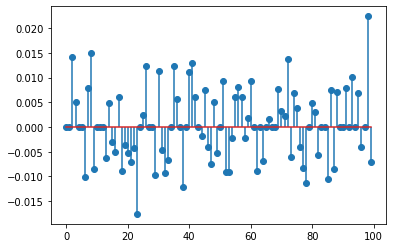

In [46]:
plt.stem(A[2,:].reshape(-1))
plt.show()